In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import matplotlib as mpl
from skimage import io, color, filters
from skimage.filters import sobel
from skimage.feature._canny import canny
from skimage.transform import resize, rotate
import pandas as pd 
from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage import data
from skimage.feature._canny import canny
import cv2
import os


In [2]:
import os

for dirname, _, filenames in os.walk('../Alzheimer_s Dataset/train/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

../Alzheimer_s Dataset/train/.DS_Store
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem48.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem49.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem17.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem2.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem3.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem16.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem28.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem14.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem1.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem15.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem29.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem11.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem4.jpg
../Alzheimer_s Dataset/train/ModerateDemented/moderateDem39.jpg
../Alz

../Alzheimer_s Dataset/train/NonDemented/nonDem380.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem394.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem382.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem396.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem1397.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem1383.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem341.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem1368.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem427.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem2107.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem2113.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem433.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem355.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem1354.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem1432.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem1426.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem369.jpg
../Alzheimer_s Dataset/train/NonDemented/nonDem1340.jpg
.

In [3]:
from tqdm import tqdm 

In [24]:
import glob
non_demented = glob.glob('../Alz_data/train/NonDemented/*.jpg')
demented = glob.glob('../Alz_data/train/ModerateDemented/*.jpg')

In [6]:
# path = ≈'../Alzheimer_s Dataset/train/NonDemented'
# dirs = os.listdir(path)

# data = []
# for file in dirs:
#     io.imread(file)
    

SyntaxError: invalid character in identifier (<ipython-input-6-5efa2d3048b3>, line 1)

In [7]:
# train_nons = '../Alzheimer_s Dataset/train/NonDemented/'
# train_mods = '../Alzheimer_s Dataset/train/ModerateDemented/'
# # image_size = 64

In [15]:
# def train_data():
#     train_non_dem = [] 
#     train_mod_dem =[]
#     for image1 in tqdm(os.listdir(train_nons)): 
#         path = os.path.join(train_nons, image1)
#         img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
#         img1 = cv2.resize(img1, (image_size, image_size))
#         train_non_dem.append(img1) 
#     for image2 in tqdm(os.listdir(train_mods)): 
#         path = os.path.join(train_mods, image2)
#         img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
#         img2 = cv2.resize(img2, (image_size, image_size))
#         train_mod_dem.append(img2) 
    
#     train_data= np.concatenate((np.asarray(train_non_dem),np.asarray(train_mods)),axis=0)
#     return train_data 

In [25]:
# train_data = train_data()

In [26]:
def turn_array(filelist):
    x = np.array([np.array(Image.open(fname)) for fname in filelist])
    return x

non_dem = turn_array(non_demented)
mod_dem = turn_array(demented)

In [27]:
reshaped = non_dem.reshape(2560, -1, 64)

In [28]:
reshaped.shape

(2560, 572, 64)

In [95]:
mod_dem

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
non_dem[0]

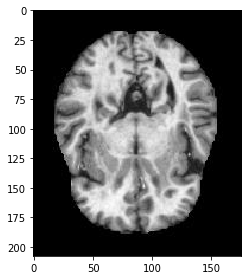

In [63]:
io.imshow(non_dem[0])

In [90]:
resized = []
for image in mod_dem.flatten():
    
#     print(image)
#     img = io.imshow(non_dem[0])
#     img = io.imread(image)
    x = resize(image, (32,32))
#     io.imshow(x)
    resized.append(x)
#     resized.append(x)

KeyboardInterrupt: 

In [92]:
non_dem[10].shape

(208, 176)

In [94]:
non_dem.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

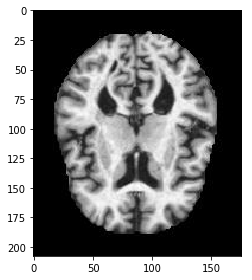

In [49]:
io.imshow(non_dem[10])

In [43]:
new_non = non_dem.resize(-1, 64, 64)

In [44]:
new_non.shape

(22880, 64, 64)

In [79]:
def reshape(images):
    arrays = []
    for image in non_dem:
        arrays.append(image.reshape(200,200))
    return arrays

In [80]:
reshape(non_dem)

ValueError: cannot reshape array of size 36608 into shape (200,200)

In [9]:
mod_dem.shape

(52, 208, 176)

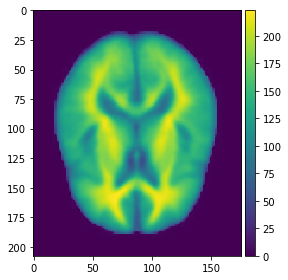

In [30]:
avg_nd = non_dem.mean(axis=0)
io.imshow(avg_nd)

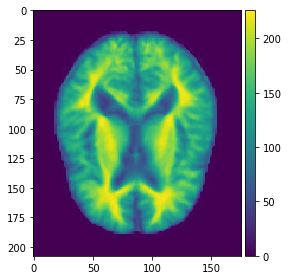

In [11]:
avg_mod = mod_dem.mean(axis=0)
io.imshow(avg_mod)

In [12]:
averages = [avg_mod, avg_nd]

In [40]:
grey_mod = rgb2gray(mod_dem[10])

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


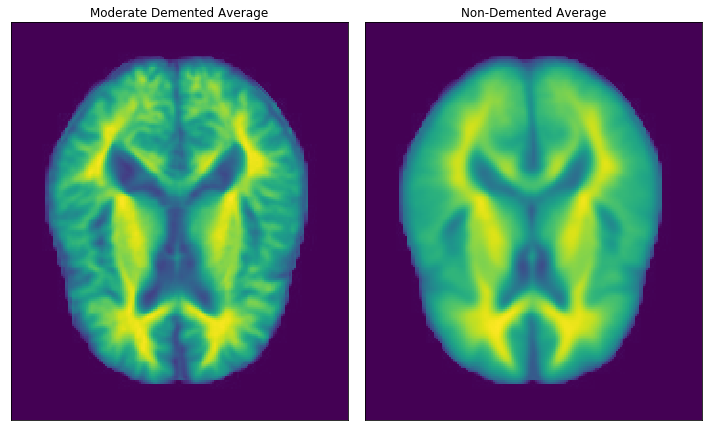

In [13]:
def graph_averages(imgs):    
    fig, axs = plt.subplots(1,2, figsize=(10,10))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[idx])
    axs[0].set_title('Moderate Demented Average')
    axs[1].set_title('Non-Demented Average')
    axs[0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/averages_of_brains.jpg')
    plt.show()
graph_averages(averages)

In [46]:
from skimage.color import rgb2gray

def compare_mri(imgs):
    greyed = []
    for image in imgs:
        greyed.append(rgb2gray(image))
    fig, axs = plt.subplots(1,2, figsize=(10,10))
    for idx, ax in enumerate(axs.flatten()):
        io.imshow(greyed[idx])
    axs[0].set_title('Moderate Demented Average')
    axs[1].set_title('Non-Demented Average')
    axs[0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/comparison_prior.jpg')
    plt.show()

    

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


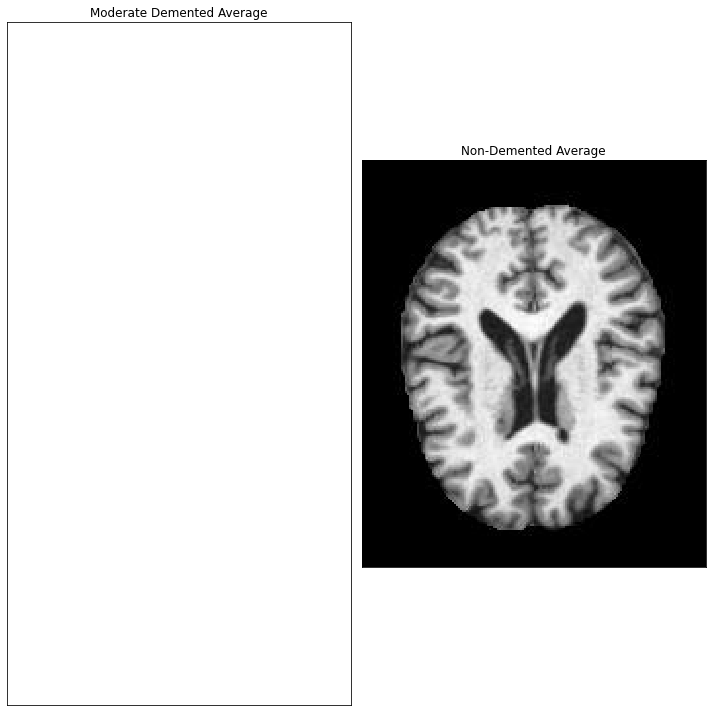

In [48]:
data = [mod_dem[10], non_dem[10]]
compare_mri(data)

In [ ]:
files = os.listdir(f'{self.folder_path}{folder}/')

In [ ]:
non_array = np.array([np.array(filelist)])

In [ ]:
non_array

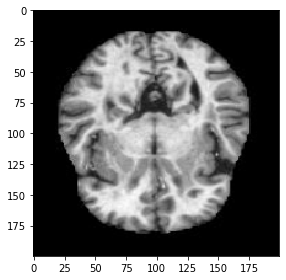

In [45]:
io.imshow(n1)

In [ ]:
image_size = 120

for image in tqdm(os.listdir(moderate)): 
    path = os.path.join(moderate, image)
    img = cv.imread(path, cv.IMREAD_GRAYSCALE) 
    img = cv.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(non_demented)): 
    path = os.path.join(non_demented, image2)
    img2 = cv.imread(path, cv.IMREAD_GRAYSCALE) 
    img2 = cv.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

In [ ]:
x = np.array([np.array(Image.open(fname)) for fname in '../Alzheimer_s Dataset/train/NonDemented'])

In [ ]:
io.imshow(np_img2.reshape(image_size, image_size))

In [ ]:
avg = np_img2.mean(axis=1)

In [ ]:
io.imshow(avg.reshape(1,-1))

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [ ]:
CHAR_DICT = {}
for char in os.listdir(CHAR_PATH):
    CHAR_DICT[char] = len(os.listdir(os.path.join(CHAR_PATH, char)))
    
# sort keys based on len value descending order
CHAR_DICT = caer.sort_dict(CHAR_DICT, descending=True)
CHAR_DICT

In [18]:
img = Image.open('Alz_data/train/ModerateDemented/moderateDem0.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'Alz_data/train/ModerateDemented/moderateDem0.jpg'

In [42]:
def read_and_resize(file):
    img = io.imread(file)
    img = resize(img, (200, 200))
    return img

i1 = read_and_resize('../Alz_data/train/ModerateDemented/moderateDem0.jpg')

In [41]:
n1 = read_and_resize('../Alz_data/train/NonDemented/nonDem0.jpg')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
path = '../Alzheimer_s Dataset/train'
a = MasterImage(PATH=path,
               IMAGE_SIZE=50)

X_data, y_data = a.load_datasetIO
print(X_data.shape)


In [ ]:
array = np.array(images)
array[1]

In [ ]:
n1.shape

In [ ]:
i1

In [ ]:
i1.shape

k means clustering 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(i1)
dem2show = kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
cluster_i1 = dem2show.reshape(i1.shape[0], i1.shape[1])
io.imshow(cluster_i1)

In [ ]:
non2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_non = non2show.reshape(n1.shape[0], n1.shape[1])
io.imshow(cluster_non)

In [ ]:
def apply_kmeans(image):
    # Getting a list of all RBG pixels in an image
    nrow, ncol = image.shape 
    lst_of_pixels = [image[irow][icol] for irow in range(nrow) for icol in range(ncol)]
    return lst_of_pixels


In [ ]:
nd1 = apply_kmeans(n1)


Edge Detection 

In [ ]:
def make_gray(img):
    img = color.rgb2gray(img)
    return img   

def apply_sobel(img):
    return filters.sobel(img)

def apply_canny(img):
    return feature.canny(img, sigma=2)

def restoration_bi(img):
    return restoration.denoise_bilateral(img, sigma_spatial=2)

def restoration_cham(img):
    return restoration.denoise_tv_chambolle(img, weight=.2)

images = [i1, n1]


In [ ]:
n_sobel = apply_sobel(n1)
io.imshow(n_sobel)

In [ ]:
def graph_filters(img):    
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(img[idx])
    plt.show()
    
graph_filters(non_dems)

In [ ]:
n_laplace = laplace(n1)
io.imshow(n_laplace)

In [ ]:
i_sobel = apply_sobel(i1)
io.imshow(i_sobel)

In [ ]:
n_canny = apply_canny(n1)
io.imshow(n_canny)

In [ ]:
n_rest_bi = restoration_bi(n1)
io.imshow(n_rest_bi)

In [ ]:
n_rest_cham = restoration_cham(n1)
io.imshow(n_rest_cham)

In [ ]:
non_dems = [n_sobel, n_canny, n_rest_bi, n_rest_cham]

In [ ]:
def graph_filters(img):    
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(img[idx])
    plt.show()
    
graph_filters(non_dems)

In [ ]:
i_rest_bi = restoration_bi(i1)
i_rest_cham = restoration_cham(i1)

In [ ]:
dem = [i_sobel, i_canny, i_rest_bi, i_rest_cham]
graph_filters(dem)

In [ ]:
i_canny = apply_canny(i1)

In [ ]:
io.imshow(i_canny)



In [ ]:
io.imshow(i_rest_bi)

In [ ]:
io.imshow(i_rest_cham)

In [ ]:
sobel_img = filters.sobel(img)
io.imshow(sobel_img);

In [ ]:
from skimage.filters import gaussian
io.imshow(gaussian(d1, sigma=3));

In [ ]:
d1 = io.imread('Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg')

In [ ]:
d2 = io.imread('Alzheimer_s Dataset/train/ModerateDemented/moderateDem1.jpg')

In [ ]:
d1

In [ ]:
d1.shape

In [ ]:
d2.shape

In [ ]:
non_dem = io.imread_collection('Alzheimer_s Dataset/train/ModerateDemented')

In [ ]:
non_demented = np.load('Alzheimer_s Dataset/train/NonDemented')

In [ ]:
nondem1_values = np.ravel(d1)
nondem1_values.shape

In [ ]:
def plot_values_histogram():
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111) 
    ax.hist(nondem1_values, bins=256) 
    ax.set_xlabel('Pixel Intensities', fontsize=14) 
    ax.set_ylabel('Frequency in Image', fontsize=14) 
    ax.set_title("Image Histogram", fontsize=16);

In [ ]:
plot_values_histogram()

In [ ]:
def plot_images(imgs, save_title='imgs.png', show = False):
    '''
    Input: Dictionary of images, plotting options. 
    Output: Plot of 2-4 images.  
    '''
    
#     if len(imgs) == 2:
#         fig, axs = plt.subplots(1,2, figsize=(8, 8))
#     elif len(imgs) == 4:
#         fig, axs = plt.subplots(2,2, figsize=(8, 8))
#     else:
#         raise ValueError("Plot function requires 2 or 4 items.")
    for ax, k, v in zip(axs.flatten(), imgs.keys(), imgs.values()): 
        ax.imshow(v, cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title('Image ' + k)
    fig.savefig(save_title)
    if show: 
        plt.show()

In [ ]:
#logistic regression 

In [ ]:
non_demented = '../Alzheimer_s Dataset/train/NonDemented'
moderate = '../Alzheimer_s Dataset/train/ModerateDemented'

In [ ]:
image_size = 120

for image in tqdm(os.listdir(moderate)): 
    path = os.path.join(moderate, image)
    img = cv.imread(path, cv.IMREAD_GRAYSCALE) 
    img = cv.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(non_demented)): 
    path = os.path.join(non_demented, image2)
    img2 = cv.imread(path, cv.IMREAD_GRAYSCALE) 
    img2 = cv.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Moderate Demented and Non Demented Brain Scans")

In [ ]:
image_size = 120

In [ ]:
def train_data():
    non_demented_train = [] 
    moderate_dem_train=[]
    for image1 in tqdm(os.listdir(non_demented)): 
        path = os.path.join(non_demented, image)
        img1 = cv.imread(path, cv.IMREAD_GRAYSCALE) 
        img1 = cv.resize(img1, (image_size, image_size))
        non_demented_train.append(img1) 
    for image2 in tqdm(os.listdir(moderate)): 
        path = os.path.join(moderate, image)
        img2 = cv.imread(path, cv.IMREAD_GRAYSCALE) 
        img2 = cv.resize(img2, (image_size, image_size))
        moderate_dem_train.append(img2) 
    
    train_data= np.concatenate((np.asarray(non_demented_train),np.asarray(moderate_dem_train)),axis=0)
    return train_data 

In [ ]:
train_data = train_data()